In [ ]:
# Importing necessary tools
!pip install GoogleNews
from pandas import DataFrame
from GoogleNews import GoogleNews
from datetime import date, timedelta

# Extracting news for a specific company
now = date.today()
yesterday = date.today() - timedelta(days=1)
google_news = GoogleNews(start=yesterday, end=now)
google_news.search("TESLA")
result = google_news.result()
print(result)
df = DataFrame(result)
print(df.head())

[{'title': 'Pwn2Own Automotive: $1.3M for 49 zero-days, Tesla hacked twice', 'media': 'Bleeping Computer', 'date': '1 hour ago', 'datetime': datetime.datetime(2024, 1, 26, 12, 47, 46, 151080), 'desc': '', 'link': 'https://www.bleepingcomputer.com/news/security/pwn2own-automotive-13m-for-49-zero-days-tesla-hacked-twice/&ved=2ahUKEwjcyt7TmPuDAxVgTDABHY7_BRsQxfQBegQIAhAC&usg=AOvVaw1fuvV5P0N08iIb2bbX92by', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}, {'title': 'Tesla recalls nearly 200,000 vehicles over faulty backup camera', 'media': 'CBS News', 'date': '1 hour ago', 'datetime': datetime.datetime(2024, 1, 26, 12, 47, 46, 163433), 'desc': '', 'link': 'https://www.cbsnews.com/news/tesla-recall-backup-camera-nearly-200000-vehicles-nhtsa/&ved=2ahUKEwjcyt7TmPuDAxVgTDABHY7_BRsQxfQBegQICRAC&usg=AOvVaw1y1t47nsJ7Txx8NnZuQC5u', 'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='}, {'title': 'Tesla Model 3 Tire 

In [ ]:
# Code snippet for summarizing articles
!pip install newspaper3k
from newspaper import article, Article, Config

# Creating an empty list
article_list = []

# Iterating over the dataframe
for i in df.index:
    article_dict = {}
    article_obj = Article(df['link'][i], config=Config())

    try:
        article_obj.download()
        article_obj.parse()
        article_obj.nlp()
    except:
        pass

    # Storing results in the dictionary
    article_dict['Date'] = df['date'][i]
    article_dict['Media'] = df['media'][i]
    article_dict['Title'] = article_obj.title
    article_dict['Article'] = article_obj.text
    article_dict['Summary'] = article_obj.summary
    article_dict['Key_words'] = article_obj.keywords
    article_list.append(article_dict)

   # print(article_list)
    #print(df['date'][i])
    print(article_obj.title)
    print(article_obj.text)


# Creating a dataframe
news_df = DataFrame(article_list)
print(news_df)







Tesla recalling nearly 200,000 vehicles because software glitch can cause backup camera to go dark
Tesla is recalling nearly 200,000 vehicles in the U.S. because the backup camera may not function while the car is in reverse.

The recall covers certain Models Y, S and X from the 2023 model year. All are equipped with “Full Self-Driving” computer 4.0 and run software version 2023.44.30 through 2023.44.30.6 or 2023.44.100.

The company says in documents posted by the U.S. National Highway Traffic Safety Administration that software instability may prevent the camera image from showing images while the Teslas are in reverse. The safety agency says that can increase the risk of a crash.

Tesla says in documents that it is not aware of any crashes or injuries. Documents say the problem has been fixed with an online software update.

Owners will be notified by letter starting March 22.

Tesla said in documents that it is not aware of any crashes, injuries or deaths related to the issue

In [ ]:
print(df.index)

RangeIndex(start=0, stop=10, step=1)


In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Code snippet for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initializing variables
positive = 0
negative = 0
neutral = 0
news_list = []
neutral_list = []
negative_list = []
positive_list = []

# Iterating over the news summaries
for news in df['title']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']

    if neg > pos:
        negative_list.append(news)
        negative += 1
    elif pos > neg:
        positive_list.append(news)
        positive += 1
    elif pos == neg:
        neutral_list.append(news)
        neutral += 1

positive_percentage = (positive / len(news_df)) * 100
negative_percentage = (negative / len(news_df)) * 100
neutral_percentage = (neutral / len(news_df)) * 100

print("Positive Sentiment:", '%.2f' % positive_percentage, end='\n')
print("Neutral Sentiment:", '%.2f' % neutral_percentage, end='\n')
print("Negative Sentiment:", '%.2f' % negative_percentage, end='\n')

Positive Sentiment: 10.00
Neutral Sentiment: 40.00
Negative Sentiment: 50.00


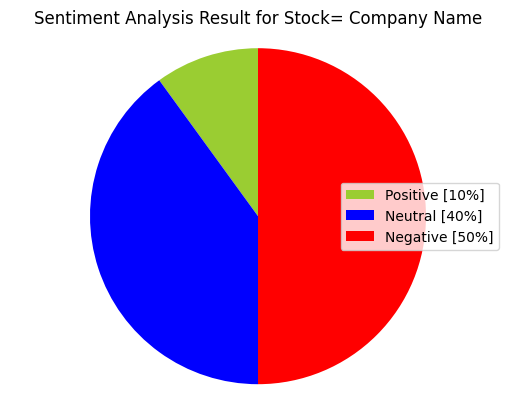

In [ ]:
# Code snippet for sentiment visualization
import matplotlib.pyplot as plt

labels = ['Positive ['+str(round(positive_percentage))+'%]' , 'Neutral ['+str(round(neutral_percentage))+'%]','Negative ['+str(round(negative_percentage))+'%]']
sizes = [positive_percentage, neutral_percentage, negative_percentage]
colors = ['yellowgreen', 'blue','red']
plt.pie(sizes, colors=colors, startangle=90)
plt.legend(labels)
plt.title("Sentiment Analysis Result for Stock= Company Name" )
plt.axis('equal')
plt.show()

In [ ]:
df['title'].dtypes


dtype('O')

In [ ]:
print(df['title'])


0    Pwn2Own Automotive: $1.3M for 49 zero-days, Te...
1    Tesla recalls nearly 200,000 vehicles over fau...
2    Tesla Model 3 Tire Pressure Sensors Messed Up ...
3    Tesla recalling nearly 200000 vehicles because...
4    Elon Musk's 'sales warning' brings $80 billion...
5    Tesla Sold Off Thursday. What Cathie Wood Did ...
6    Tesla Stock Has Plunged 52%. Can It Rejoin the...
7    Tesla Can't Keep Up With the Rest of the 'Magn...
8    How a hot EV company most Americans have never...
9    Tesla Earnings Show the Stock Can’t Live in Mu...
Name: title, dtype: object


In [ ]:
df['title'] = df['title'].astype(str)
